### Based on [PyTorch 60 min blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

In [4]:
import torch, torchvision
import torchvision.transforms as transforms
from torch.nn.functional import relu
import numpy as np
import matplotlib.pyplot as plt

## Creating tensors

In [5]:
# Initializing a tensor (manually)
manualTensor = torch.tensor([[1,2], [3,4]])
manualTensor

tensor([[1, 2],
        [3, 4]])

In [6]:
# Initializing a tensor (from a NumPy array)
npTensor = torch.from_numpy(np.array([[1,2], [3,4], [5,6]]))
npTensor

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [7]:
# Initializing a tensor (from another tensor)
onesTensor = torch.ones_like(manualTensor)
onesTensor

tensor([[1, 1],
        [1, 1]])

In [8]:
# Randomly initializing a random tensor (from another tensor)
randTensor = torch.rand_like(npTensor, dtype=torch.float)
randTensor

tensor([[0.1148, 0.8467],
        [0.5388, 0.5060],
        [0.0496, 0.5307]])

In [9]:
# Initializing tensors out-of-the-box (OOB)
SHAPE = (4, 2)
randTensorOOB = torch.rand(SHAPE)
onesTensorOOB = torch.ones(SHAPE)
zerosTensorOOB = torch.zeros(SHAPE)

## Tensor properties

In [10]:
# Shape
randTensor.shape

torch.Size([3, 2])

In [11]:
# Data type of tensor elements
randTensor.dtype

torch.float32

In [12]:
# Device tensor is stored on
randTensor.device

device(type='cpu')

## Basic tensor operations

See comprehensive list [here](https://pytorch.org/docs/stable/torch.html).

In [13]:
# Move tensor to GPU
if torch.cuda.is_available():
  randTensor = randTensor.to('cuda')
  print(f'Tensor is stored on:', randTensor.device)

Tensor is stored on: cuda:0


In [14]:
# Indexing
randTensor[:,1]

tensor([0.8467, 0.5060, 0.5307], device='cuda:0')

In [15]:
# Concatenating tensors
torch.cat([randTensorOOB, onesTensorOOB], dim=1)

tensor([[0.8448, 0.6829, 1.0000, 1.0000],
        [0.1527, 0.9728, 1.0000, 1.0000],
        [0.9978, 0.5955, 1.0000, 1.0000],
        [0.8559, 0.8529, 1.0000, 1.0000]])

In [16]:
# Elementwise tensor multiplication
randTensor.mul(randTensor)

tensor([[0.0132, 0.7169],
        [0.2903, 0.2561],
        [0.0025, 0.2816]], device='cuda:0')

In [17]:
# Elementwise tensor multiplication (alternate)
randTensor * randTensor

tensor([[0.0132, 0.7169],
        [0.2903, 0.2561],
        [0.0025, 0.2816]], device='cuda:0')

In [18]:
# Matrix multiplication between tensors
randTensor.matmul(randTensor.T)

tensor([[0.7301, 0.4903, 0.4550],
        [0.4903, 0.5464, 0.2953],
        [0.4550, 0.2953, 0.2841]], device='cuda:0')

In [19]:
# Matrix multiplication between tensors (alternate)
randTensor @ randTensor.T

tensor([[0.7301, 0.4903, 0.4550],
        [0.4903, 0.5464, 0.2953],
        [0.4550, 0.2953, 0.2841]], device='cuda:0')

In [20]:
# In-place transpose (* in-place operations have a '_' suffix)
randTensor.t_()

tensor([[0.1148, 0.5388, 0.0496],
        [0.8467, 0.5060, 0.5307]], device='cuda:0')

In [21]:
# In-place elementwise addition
onesTensorOOB.add_(10)

tensor([[11., 11.],
        [11., 11.],
        [11., 11.],
        [11., 11.]])

In [22]:
# Tensor to NumPy array
randTensorOOB.numpy()

array([[0.84476674, 0.68290806],
       [0.15267605, 0.9727917 ],
       [0.99777687, 0.59548074],
       [0.8558971 , 0.85286075]], dtype=float32)

## Computing gradients and updating weights

In [23]:
# Loading a toy pretrained model
resnet18 = torchvision.models.resnet18(pretrained=True)

In [24]:
# Creating some random data/labels
data, labels = torch.rand(1, 3, 64, 64), torch.rand(1, 1000)

In [25]:
# Forward pass through model
pred = resnet18(data)

In [26]:
# Compute loss over predictions
loss = (pred - labels).sum()
loss

tensor(-502.6020, grad_fn=<SumBackward0>)

In [27]:
# Perform backpropagation and store the gradients for each
# model parameter in the parameter's .grad attribute
loss.backward()

In [28]:
# Initialize an optimizer
optim = torch.optim.SGD(resnet18.parameters(), 
                        lr=1e-2, 
                        momentum=.9) # stochastic gradient descent optimizer

In [29]:
# Initiate gradient descent and make the optimizer adjust
# each parameter by its gradient
optim.step()

## Differentiation in Autograd

In [30]:
# Initialize tensors that require gradient tracking
a = torch.rand((2,3,3,4), requires_grad=True) # 4 dimensions = rank-4 tensor
b = torch.rand((2,3,3,4), requires_grad=True)

In [31]:
# Compute loss with toy loss function 4a^4 - 2b^5
toyLoss = 4*a**4 - 2*b**5

In [32]:
# Compute gradients for "parameters" a and b
toyLoss.sum().backward()

In [33]:
# Check that computed gradients match analytic gradients
print((16*a**3 == a.grad))
print((-10*b**4 == b.grad))

tensor([[[[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         [[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         [[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]]],


        [[[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         [[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         [[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]]]])
tensor([[[[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         [[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]],

         [[True, True, True, True],
          [True, True, True, True],
          [True, True, True, True]]],


     

## Freezing parameters and finetuning

In [34]:
# Freeze parameters in a pretrained model
for param in resnet18.parameters():
  param.requires_grad = False

In [36]:
# Replace final layer of model with unfrozen layer for finetuning
resnet18.fc = torch.nn.Linear(512, 10)

## Example: Train a CNN for image classification

In [37]:
# Load training and test data
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
BATCH_SIZE = 4
train_data = torchvision.datasets.CIFAR10(root='./data',
                                          train=True,
                                          download=True,
                                          transform=transform)
trainloader = torch.utils.data.DataLoader(train_data,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True,
                                          num_workers=2)
test_data = torchvision.datasets.CIFAR10(root='./data',
                                         train=False,
                                         download=True,
                                         transform=transform)
testloader = torch.utils.data.DataLoader(test_data,
                                        batch_size=BATCH_SIZE,
                                        shuffle=False,
                                        num_workers=2)
CLASSSES = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


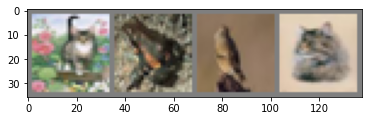

In [38]:
# Displaying some of the training images
def imShow(img):
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

dataIterator = iter(trainloader)
images, labels = dataIterator.next()

imShow(torchvision.utils.make_grid(images))

In [41]:
# Define a convolutional neural network
class CNN(torch.nn.Module):
  def __init__(self):
    super().__init__() # call parent class constructor
    self.conv1 = torch.nn.Conv2d(3, 6, 5) # First convolutional layer
    self.pool = torch.nn.MaxPool2d(2, 2) # Max pooling layer
    self.conv2 = torch.nn.Conv2d(6, 16, 5) # Second convolutional layer
    self.fc1 = torch.nn.Linear(16*5*5, 120) # First fully connected linear layer
    self.fc2 = torch.nn.Linear(120, 84) # Second fully connected linear layer
    self.fc3 = torch.nn.Linear(84, 10) # Third fully connected linear layer
  
  # Perform forward pass on input through network (x is an input tensor)
  def forward(self, x):
    x = self.pool(relu(self.conv1(x))) # x' = maxPool(ReLU(convolute(x)))
    x = self.pool(relu(self.conv2(x))) # x'' = maxPool(ReLU(convolute(x)))
    x = torch.flatten(x, 1) # flatten all dimensions except batch, x''' = flatten(x'')
    x = relu(self.fc1(x)) # x'''' = ReLU(linear(x'''))
    x = relu(self.fc2(x)) # x''''' = ReLU(linear(x''''))
    x = self.fc3(x) # x_final = linear(x''''')
    return x

In [42]:
# Initialize the model
cnn = CNN()

In [43]:
# Define a loss function
lossFunc = torch.nn.CrossEntropyLoss()

In [44]:
# Define an optimizer
optim = torch.optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)

In [45]:
# Train the network
EPOCHS = 2
for epoch in range(EPOCHS):

  cumul_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # get train inputs and input labels
    inputs, labels = data 

    # set parameter gradients to zero
    optim.zero_grad()

    # perform forward pass
    pred = cnn(inputs) # calls forward() method

    # compute loss
    loss = lossFunc(pred, labels)

    # backpropagate loss, compute gradients
    loss.backward()

    # adjust weights according to gradients
    optim.step()

    # accumulate cumulative loss
    cumul_loss += loss.item()
    if i % 1000 == 0 and i > 0:
      print('Minibatch loss after {} steps: {:.2f}'.format(i, cumul_loss))
      cumul_loss = 0

print('Training complete')

Minibatch loss after 1000 steps: 2299.47
Minibatch loss after 2000 steps: 2123.60
Minibatch loss after 3000 steps: 1893.51
Minibatch loss after 4000 steps: 1766.53
Minibatch loss after 5000 steps: 1653.85
Minibatch loss after 6000 steps: 1600.21
Minibatch loss after 7000 steps: 1574.18
Minibatch loss after 8000 steps: 1554.99
Minibatch loss after 9000 steps: 1520.87
Minibatch loss after 10000 steps: 1477.73
Minibatch loss after 11000 steps: 1446.47
Minibatch loss after 12000 steps: 1486.25
Minibatch loss after 1000 steps: 1393.94
Minibatch loss after 2000 steps: 1356.10
Minibatch loss after 3000 steps: 1382.41
Minibatch loss after 4000 steps: 1347.68
Minibatch loss after 5000 steps: 1348.88
Minibatch loss after 6000 steps: 1347.79
Minibatch loss after 7000 steps: 1313.82
Minibatch loss after 8000 steps: 1346.90
Minibatch loss after 9000 steps: 1315.12
Minibatch loss after 10000 steps: 1288.31
Minibatch loss after 11000 steps: 1245.51
Minibatch loss after 12000 steps: 1287.73
Training c

In [46]:
# Saving model

PATH_TO_MODEL = 'path/to/model'
# torch.save(cnn.state_dict(), PATH_TO_MODEL)

In [ ]:
# Load saved model

# cnn = CNN()
# cnn.load_state_dict(torch.load(PATH_TO_MODEL))

In [49]:
# Evaluating on the test data
correct, total = 0, 0

# We don't need to store gradients anymore since we're not training
with torch.no_grad(): 
  for data in testloader:
    images, labels = data
    # Make predictions by passing images through trained model
    test_pred = cnn(images)
    # Choose class with highest energy as prediction
    _, prediction = torch.max(test_pred.data, 1)
    total += labels.size(0)
    correct += (prediction == labels).sum().item()

print('Accuracy of the model over 10,000 test images: {:}%'.format(100*correct/total))

Accuracy of the model over 10,000 test images: 54.89%


In [50]:
# Training on GPU

# Set device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [51]:
# Transfer model to GPU
cnn.to(device)

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# To train on GPU, ALL data must be transferred to the GPU as well, e.g. 
# inputs, labels = data[0].to(device), data[1].to(device)